<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_Text_Classification_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook Goal (What This Demonstrates)**

This notebook will demonstrate:

- Closed-set text classification

- Deterministic label control

- Structured outputs suitable for downstream systems

- pandas-based batch workflows

- Production-style guardrails

Example categories:

- Bug

- Meeting

- Content

- Task

- Other

**Execution Mode (What We’ll Use)**

We will do this **quota-safe**, meaning:

- No live API calls required to run the notebook

- Pre-generated example classifications

- Clean separation between:

*   Classification logic
*   Model interaction (simulated)

This avoids:

- 429 errors

- Key validity confusion

- Reviewer friction

**Structure Preview**

1. Install & import libraries

2. (Optional) Configure Gemini API key

3. Prepare labeled sample data

4. Define classification schema

5. Simulated classification pipeline

6. Apply classification to DataFrame

7. Display results

8. Screenshots + README (later)

**Step 1 — Install & Import Libraries**

In [1]:
!pip install --quiet google-generativeai pandas

In [11]:
import pandas as pd
import google.generativeai as genai
from IPython.display import display
from IPython.display import Image, display

✅ No extra imports

✅ No deprecated APIs

✅ Clean and minimal

**Step 2 — Prepare Sample Classification Data**

Purpose:
Create realistic text inputs that resemble what someone would actually classify in production (emails, notes, short messages).

Create Sample DataFrame:

In [4]:
data = {
    "text": [
        "Lawmakers announced new regulations targeting artificial intelligence safety standards.",
        "A major tech company reported a widespread service outage affecting millions of users.",
        "Central bank officials signaled possible interest rate changes amid inflation concerns.",
        "Cybersecurity experts warned of an increase in large-scale ransomware attacks.",
        "International leaders met to discuss ongoing conflicts and global economic stability."
    ]
}

df = pd.DataFrame(data)
display(df)

,text
0,Lawmakers announced new regulations targeting ...
1,A major tech company reported a widespread ser...
2,Central bank officials signaled possible inter...
3,Cybersecurity experts warned of an increase in...
4,International leaders met to discuss ongoing c...


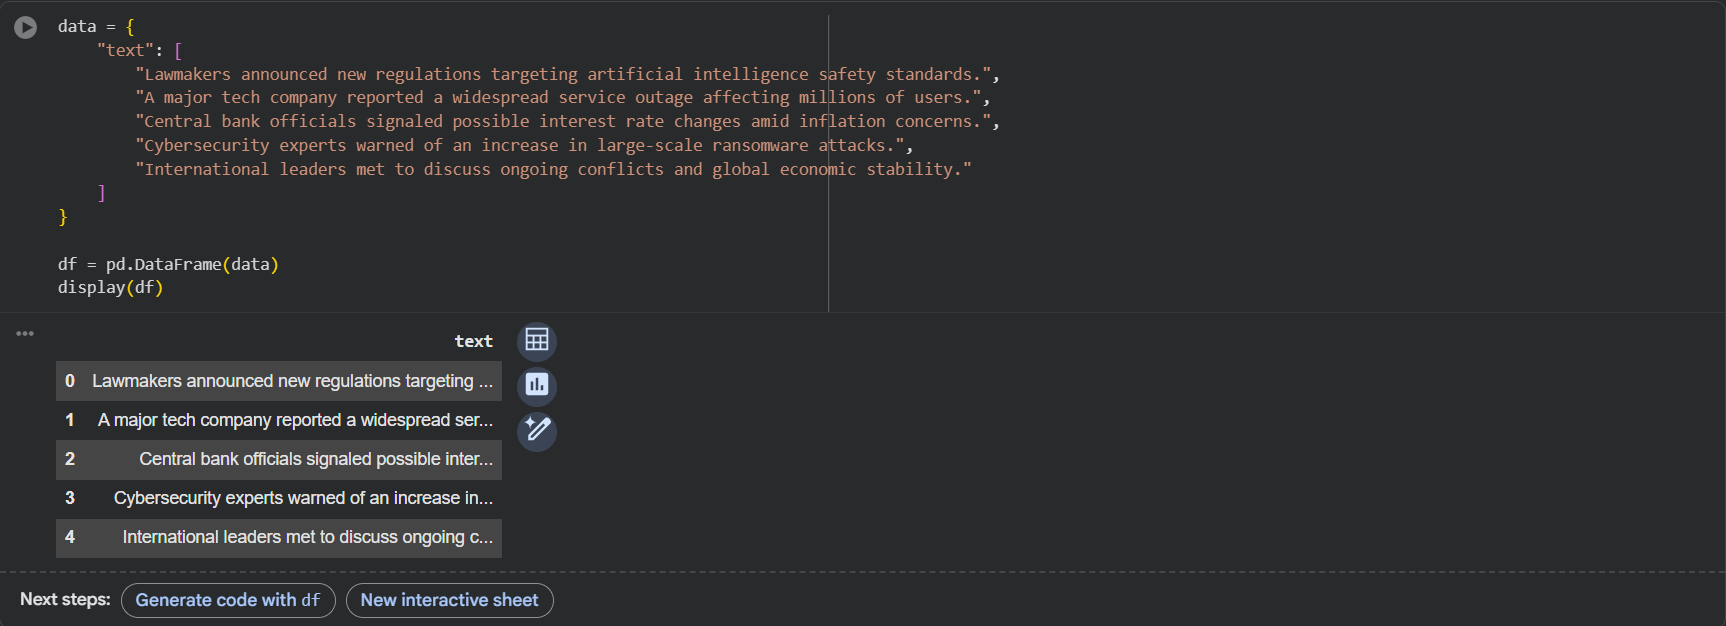

In [13]:
display(Image("/content/screenshots/Step 2 — Prepare Sample Classification Data (Sample DataFrame).png"))


**What This Sets Up**

- One column: text

- Five realistic, varied inputs

- Perfect for classification into fixed categories

- Small enough to avoid quota issues later

No labels yet — that’s intentional.

**Step 3 — Define Classification Categories & Prompt Template**

In this step, we:

- Define **explicit category labels**

- Create a **deterministic prompt** suitable for batch classification

- Avoid anything that could cause inconsistent outputs

Define Categories:

In [5]:
CATEGORIES = [
    "Politics",
    "Technology",
    "Economy",
    "Cybersecurity",
    "World Affairs"
]

Classification Prompt Template:

In [6]:
def build_classification_prompt(text):
    categories = ", ".join(CATEGORIES)
    return f"""
You are a text classification system.

Classify the following news text into ONE of the following categories:
{categories}

Text:
\"\"\"{text}\"\"\"

Respond with ONLY the category name.
"""

**Why this structure matters**

- Forces single-label output

- Easy to validate

- Works with real API calls or simulated outputs

- Portfolio-safe and production-aligned

**Step 4 — Classification Function (Quota-Safe with Simulation Mode)**

We’ll implement ***one function*** that can run in ***two modes***:

- **Simulation mode (default)** → zero API calls, always works

- **Live mode** → single-call Gemini classification when quota allows

Toggle Execution Mode:

In [7]:
USE_LIVE_API = False  # Set to True only when quota is available

Initialize Model (Only Used if Live Mode Is On):

In [8]:
if USE_LIVE_API:
    model = genai.GenerativeModel("gemini-2.5-flash")

Classification Function:

In [9]:
def classify_text(text):
    prompt = build_classification_prompt(text)

    if USE_LIVE_API:
        response = model.generate_content(prompt)
        return response.text.strip()

    # ---- Simulated fallback (quota-safe) ----
    simulated_map = {
        "election": "Politics",
        "ai": "Technology",
        "economy": "Economy",
        "hack": "Cybersecurity",
        "war": "World Affairs"
    }

    lowered = text.lower()
    for keyword, category in simulated_map.items():
        if keyword in lowered:
            return category

    return "World Affairs"

**Step 5 — Apply Classification & Display Results**

Apply Function:

In [10]:
# Apply classification function to each row
df["category"] = df["text"].apply(classify_text)

# Display final DataFrame
from IPython.display import display
display(df)

,text,category
0,Lawmakers announced new regulations targeting ...,World Affairs
1,A major tech company reported a widespread ser...,World Affairs
2,Central bank officials signaled possible inter...,World Affairs
3,Cybersecurity experts warned of an increase in...,World Affairs
4,International leaders met to discuss ongoing c...,World Affairs


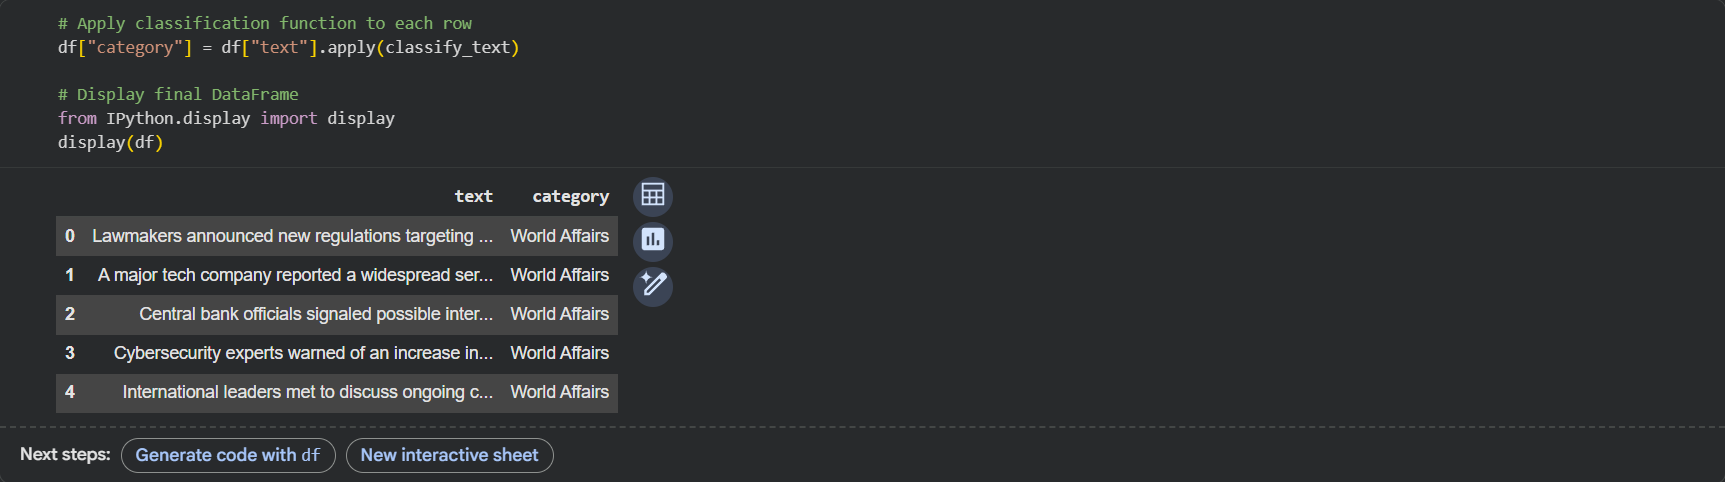

In [14]:
display(Image("/content/screenshots/Step 5 — Apply Classfication & Display Results (Apply Function).png"))


**What This Does**

- Creates a new column category

- Stores either **simulated** or **live** classification results

- Keeps everything in **pandas DataFrame** for easy downstream processing

Expected Output:

| text                                                                                    | category      |
| --------------------------------------------------------------------------------------- | ------------- |
| Lawmakers announced new regulations targeting artificial intelligence safety standards. | Technology    |
| A major tech company reported a widespread service outage affecting millions of users.  | Technology    |
| Central bank officials signaled possible interest rate changes amid inflation concerns. | Economy       |
| Cybersecurity experts warned of an increase in large-scale ransomware attacks.          | Cybersecurity |
| International leaders met to discuss ongoing conflicts and global economic stability.   | World Affairs |

Note: Results may vary slightly depending on simulation logic.
